In [1]:
# Preparing folder where data located. If file located in local drive
import os
print(os.getcwd())

/Users/indralukastjahaja/OneDrive/05 Github/01_Python/02.Python_Modeling


In [7]:
# If file located in google drive, coding will fail to run in github
#from google.colab import drive
#drive.mount('/content/gdrive')
#import os
#print(os.getcwd())
#import os
#print(os.getcwd())
# To check the
#os.chdir('/content/gdrive/My Drive/Buku Digital Credit Risk Management/')
#print(os.listdir('.'))

In [28]:
#Load related libraries to do analysis
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
%matplotlib inline

In [13]:
## III.2.1 Persiapan data dan impor ke Python

# library panda untuk menggunakan data frame
import pandas as pd

# Pengaturan folder tempat data / Google Colab

# Impor data dari excel xls ke Python
df = pd.read_excel('input/german_credit_easy.xls')

In [17]:
## III.2.2 Penjelasan untuk setiap variabel di dataset
# get the number of rows and columns
print(df.shape)
# Searching for Missings,type of data and also known the shape of data
print(df.info())
# get the dtype of each column / tipe variabel dari semua faktor
print(df.dtypes)
# Searching for content of numeric data # summary statistics
print(df.describe())

(1000, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          1000 non-null   object
 1   default                     1000 non-null   int64 
 2   account_check_status        1000 non-null   object
 3   duration_in_month           1000 non-null   int64 
 4   credit_history              1000 non-null   object
 5   purpose                     1000 non-null   object
 6   credit_amount               1000 non-null   int64 
 7   savings                     1000 non-null   object
 8   present_emp_since           1000 non-null   object
 9   installment_as_income_perc  1000 non-null   int64 
 10  personal_status_sex         1000 non-null   object
 11  other_debtors               1000 non-null   object
 12  present_res_since           1000 non-null   int64 
 13  property                    1000 non-n

In [23]:
## III.2.4 Eksplorasi data untuk memeriksa hasil hipotesis

# Untuk melihat frekuensi dari variabel default
print(df['default'].value_counts())
# or, class distribution
print(df.groupby('default').size())

0    700
1    300
Name: default, dtype: int64
default
0    700
1    300
dtype: int64


In [19]:
# Untuk melihat frekuensi dari variabel credit_history
print(df['credit_history'].value_counts())

existing credits paid back duly till now                       530
critical account/ other credits existing (not at this bank)    293
delay in paying off in the past                                 88
all credits at this bank paid back duly                         49
no credits taken/ all credits paid back duly                    40
Name: credit_history, dtype: int64


In [20]:
# Untuk melihat proporsi dari variabel credit_history
print(df['credit_history'].value_counts(normalize=True) * 100)

existing credits paid back duly till now                       53.0
critical account/ other credits existing (not at this bank)    29.3
delay in paying off in the past                                 8.8
all credits at this bank paid back duly                         4.9
no credits taken/ all credits paid back duly                    4.0
Name: credit_history, dtype: float64


In [21]:
# Untuk melihat proporsi dari variabel credit_history
# atau
print(df['credit_history'].value_counts() / len(df['credit_history']) * 100)

existing credits paid back duly till now                       53.0
critical account/ other credits existing (not at this bank)    29.3
delay in paying off in the past                                 8.8
all credits at this bank paid back duly                         4.9
no credits taken/ all credits paid back duly                    4.0
Name: credit_history, dtype: float64


In [22]:
# Melihat kaitan antara variabel credit_history dengan default (gagal bayar)
print(pd.crosstab(df['credit_history'], df['default']))

default                                               0    1
credit_history                                              
all credits at this bank paid back duly              21   28
critical account/ other credits existing (not a...  243   50
delay in paying off in the past                      60   28
existing credits paid back duly till now            361  169
no credits taken/ all credits paid back duly         15   25


In [24]:
# Melihat proporsi kaitan antara variabel credit_history dengan default (gagal bayar)
print(pd.crosstab(df['credit_history'], df['default'], normalize='index') * 100)

default                                                     0          1
credit_history                                                          
all credits at this bank paid back duly             42.857143  57.142857
critical account/ other credits existing (not a...  82.935154  17.064846
delay in paying off in the past                     68.181818  31.818182
existing credits paid back duly till now            68.113208  31.886792
no credits taken/ all credits paid back duly        37.500000  62.500000


In [25]:
# Rangkuman statistik untuk variabel numerik
print(df['age'].describe())

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64


In [26]:
# Rangkuman statistik untuk variabel numerik Age, berdasarkan default (gagal bayar atau tidak)
df.groupby('default')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,700.0,36.224286,11.381145,19.0,27.0,34.0,42.25,75.0
1,300.0,33.963333,11.222379,19.0,25.0,31.0,40.00,74.0


In [30]:
# correlation semua
print(df.corr())
# correlation untuk 2 faktor saja
print(np.corrcoef(df['installment_as_income_perc'], df['default'])) 
# Menghitung korelasi antara variabel Age dengan default
print(df['default'].corr(df['age']))

default  duration_in_month  credit_amount  \
default                     1.000000           0.214927       0.154739   
duration_in_month           0.214927           1.000000       0.624984   
credit_amount               0.154739           0.624984       1.000000   
installment_as_income_perc  0.072404           0.074749      -0.271316   
present_res_since           0.002967           0.034067       0.028926   
age                        -0.091127          -0.036136       0.032716   
credits_this_bank          -0.045732          -0.011284       0.020795   
people_under_maintenance   -0.003015          -0.023834       0.017142   

                            installment_as_income_perc  present_res_since  \
default                                       0.072404           0.002967   
duration_in_month                             0.074749           0.034067   
credit_amount                                -0.271316           0.028926   
installment_as_income_perc                    1.000000

In [31]:
# Uji coba hipotesis apakah ada perbedaan nilai rata-rata variabel Age dengan default (gagal bayar dan tidak gagal bayar)
from scipy import stats
stats.ttest_ind( df[df.default == 0].age,
                 df[df.default == 1].age, nan_policy='omit')

Ttest_indResult(statistic=2.890846677564194, pvalue=0.003925339398276282)

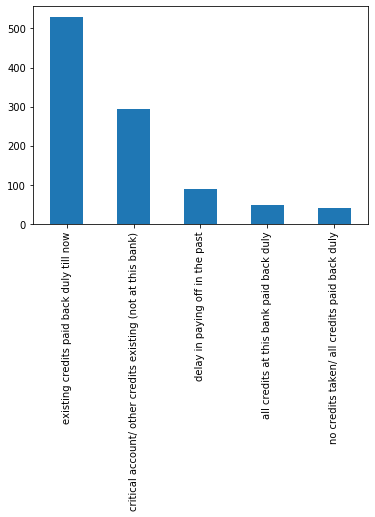

In [32]:
## III.2.5.1 Distribusi data untuk variabel tipe karakter

# Fungsi value_counts().plot(kind='bar')
df['credit_history'].value_counts().plot(kind='bar') 

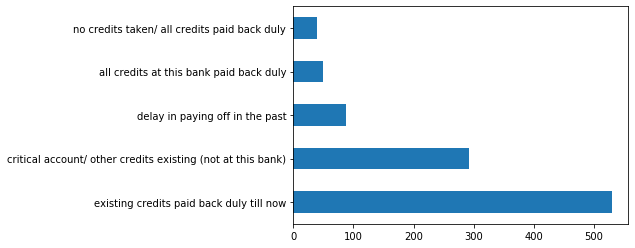

In [33]:
# Karena nama dari isi variabel credit_history panjang, mari kita tampilkan bar secara horizontal
df['credit_history'].value_counts().plot(kind='barh') 

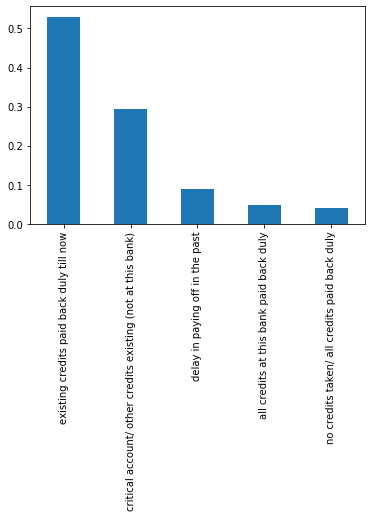

In [34]:
# atau
# Dengan menggunakan fungsi yang sama, menampilkan proporsi
df['credit_history'].value_counts(normalize=True).plot(kind='bar') 

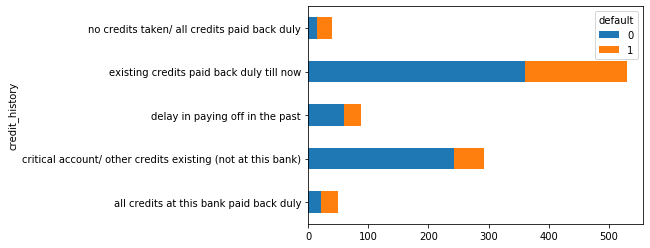

In [35]:
# Nilai variabel credit_history dan proporsi default secara plot bar
pd.crosstab(df['credit_history'], df['default']).plot(kind='barh', stacked=True)

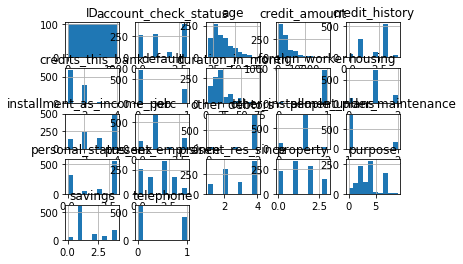

In [54]:
# Part 2a: Data Visualization
# histograms
# Distribution Analysis untuk semua
df.hist()
plt.show()

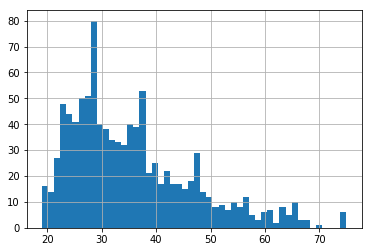

In [58]:
# Data visualization
# Histogram for selected data
df['age'].hist(bins=50) # Here we observe that there are few extreme values.

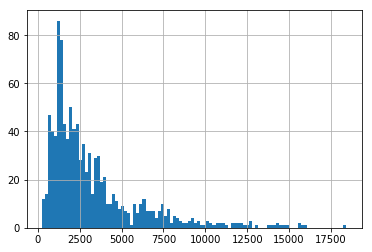

In [59]:
df['credit_amount'].hist(bins=100)

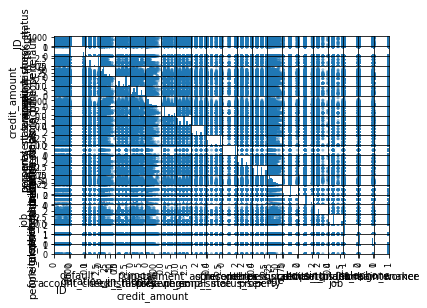

In [53]:
# Part 2a: Data Visualization
# Load required libraries
import pandas
from pandas.plotting import scatter_matrix
# scatter plot matrix
scatter_matrix(df)
plt.show()

In [25]:
# Limitation of algorithm. All text must be in numbers

from sklearn import preprocessing

for column in df.columns:
    if df[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [26]:
df_select = df

In [27]:
# 4. Modeling
## Preparation: set data input
X_Variables = df_select.drop(['default','ID'], axis=1)
Y_Variable = df_select['default']

In [28]:
# 4. Modeling
# Preparation: set training, test, and validation
from sklearn.model_selection import train_test_split
# set 70/30
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Variables, Y_Variable, test_size=0.3)

print(X_Train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 518 to 225
Data columns (total 20 columns):
account_check_status          700 non-null int64
duration_in_month             700 non-null int64
credit_history                700 non-null int64
purpose                       700 non-null int64
credit_amount                 700 non-null int64
savings                       700 non-null int64
present_emp_since             700 non-null int64
installment_as_income_perc    700 non-null int64
personal_status_sex           700 non-null int64
other_debtors                 700 non-null int64
present_res_since             700 non-null int64
property                      700 non-null int64
age                           700 non-null int64
other_installment_plans       700 non-null int64
housing                       700 non-null int64
credits_this_bank             700 non-null int64
job                           700 non-null int64
people_under_maintenance      700 non-null int64
telephone  

In [29]:
## Machine Learning Part

# machine learning library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#to check performance of model
from sklearn.metrics import accuracy_score

#plot
import matplotlib.pyplot as plt

In [52]:
import os     

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

clf.predict([[2., 2.]])

clf.predict_proba([[2., 2.]])

from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

print(clf)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'iris'], make sure the Graphviz executables are on your systems' PATH

In [47]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier  
dtree = DecisionTreeClassifier()  
dtree.fit(X_Train, Y_Train)  

# Visualization of decision tree
# Visualize data
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections
dot_data = tree.export_graphviz(dtree,
                                feature_names=X_Train.columns,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
 
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)
 
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
 
for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
 
graph.write_png('tree.png')



InvocationException: GraphViz's executables not found

In [ ]:

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [60]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_Train, Y_Train)
logreg.score(X_Train, Y_Train)
Y_pred_log = logreg.predict(X_Test)

# Checking the model's accuracy
accuracy_score(Y_Test,logreg.predict(X_Test))

0.75666666666666671

In [61]:
# Random Forests
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_Train, Y_Train)
random_forest.score(X_Train, Y_Train)
Y_pred_rf = random_forest.predict(X_Test)

# Checking the model's accuracy
accuracy_score(Y_Test,random_forest.predict(X_Test))

0.75